# Introdução

Utilizaremos um conjunto de dados, um dataset chamado Fashion-MNIST, organizado com imagens de várias roupas diferentes, e foi feito pelo grupo de pesquisa denominado Zalando Research. Além disso, faremos nosso código com a biblioteca do Google especializada em Redes Neurais Profundas chamada TensorGlow, como a nossa camada de mais baixo nível para comunicação com uma máquina.

Depois, escreveremos a maior parte do código usando Keras, API alto nível que está acima do TensorFlow, e faremos tudo isso usando a linguagem Python. Importaremos estas bibliotecas, carregar nosso dataset, explorar e exibir nossos dados, fazer um gráfico, também iremos normalizar esta imagem, criar, compilar, treinar e salvar nosso modelo. Visualizaremos a acurácia, a perda, e entender o que é isso durante o curso, saber se o modelo está indo bem, ou não, ajustá-lo, testá-lo e avaliá-lo.

Com isso começaremos a entender o que é este mundo de Deep Learning, e como nos locomovemos em todas estas probabilidades que não são tão exatas como gostaríamos.

Ver também: https://github.com/zalandoresearch/fashion-mnist
![](rot.gif)
___

## Contexto
Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza de 28x28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos escritos à mão. Os membros da comunidade AI / ML / Data Science adoram este conjunto de dados e o usam como referência para validar seus algoritmos. Na verdade, o MNIST costuma ser a primeira tentativa dos pesquisadores de conjuntos de dados. “Se não funcionar no MNIST, não funcionará de jeito nenhum”, disseram. "Bem, se funcionar no MNIST, ainda pode falhar em outros."
___
## Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total. Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão desse pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste têm 785 colunas. A primeira coluna consiste nas etiquetas da classe (veja acima) e representa a peça de roupa. O restante das colunas contém os valores de pixel da imagem associada.

___

## Escopo

1. Conhecer o conjunto de dados
2. Modelo de classificação (redes neurais)
3. Adicionar camadas a rede neural 
4. Métricas de avaliação do modelo
___

## Bibliotecas 

In [1]:
# Básico 
import numpy as np
import pandas as pd

# Gráfico 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos de redes neurais 
import tensorflow
from tensorflow  import keras

# Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score , roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

# Disabilitar avisos
import warnings
warnings.filterwarnings('ignore')

C:\Users\Felipe\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


___
# 1. Conhecer conjunto de dados 

In [2]:
#Criar um data frame
df=keras.datasets.fashion_mnist
# Separar imagens e rotulos 
((imagens_treino,rotulos_treino),(imagens_teste,rotulos_teste))=df.load_data()

In [3]:
#Tamanho do data frame
print('Imagens de treino:',len(imagens_treino),'|Com dimensão de:',imagens_treino.shape)
print('Imagens de teste :',len(imagens_teste),'|Com dimensão de:',imagens_treino.shape)
print('No total existem {} classes de produtos diferentes'.format(len(np.unique(rotulos_teste))))


Imagens de treino: 60000 |Com dimensão de: (60000, 28, 28)
Imagens de teste : 10000 |Com dimensão de: (60000, 28, 28)
No total existem 10 classes de produtos diferentes


Text(0.5, 1.0, '9')

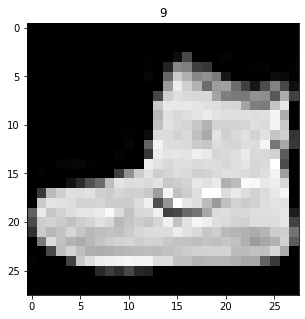

In [4]:
#Visulizar uma imagem
plt.rcParams['figure.figsize'] = (5,5)
plt.imshow(imagens_treino[0],cmap='gray')
plt.title(rotulos_treino[0])

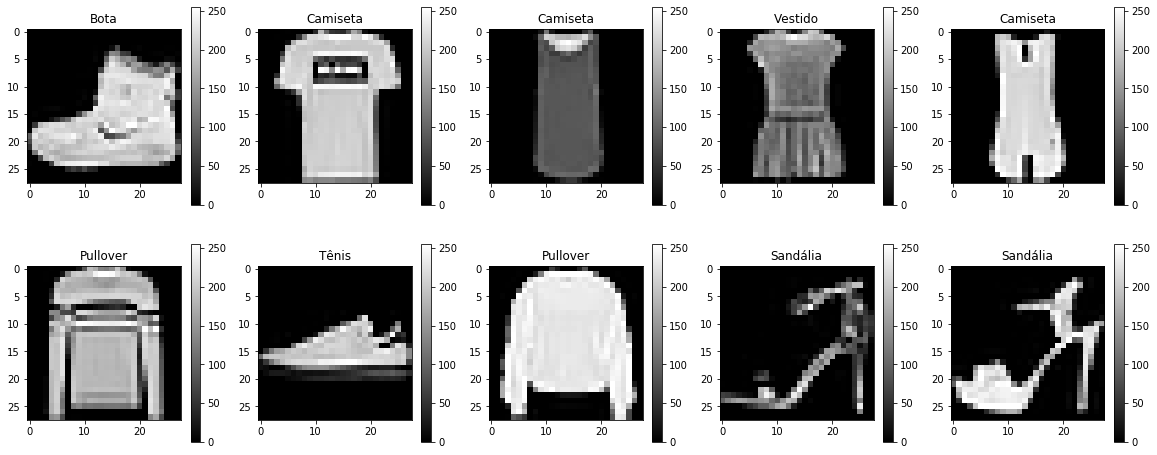

In [5]:
#Visulizar multiplas imagens e a escala de cinza de cinza original
nomes_rotulos=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']
plt.rcParams['figure.figsize'] = (20,8)
for imagem in range (len(nomes_rotulos)):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem],cmap='gray')
    plt.title(nomes_rotulos[rotulos_treino[imagem]])
    plt.colorbar()

___
## 1.1. Propriedades das imagem

### Pixel

Um pixel é a menor unidade que compõe uma imagem, seja ela uma foto ou um frame (quadro) de um vídeo. Eles estão presentes não só em filmes, animações e capturas fotográficas, como também são parte importante das telas de TVs, monitores e smartphones e de sensores de câmeras.

A palavra pixel é uma combinação dos termos “picture” e “element”. Ou seja, “elemento de imagem”. É a menor unidade de uma imagem digital, independente de sua fonte. Se você pegar uma foto e fizer uma aproximação (zoom), verá uma série de quadradinhos que a compõem. Cada um desses quadros é um pixel. São milhões ou milhares deles.

![](pixel.png)

### Escala de cinza

Em computação, uma imagem digital em nível de cinza, ou nível de cinzento (português europeu) é uma imagem na qual o valor de cada pixel é uma única amostra de um espaço de cores. Imagens desse tipo são tipicamente compostas com tons de cinza, variando entre o preto como a menor intensidade e o branco como maior intensidade. Imagens em nível de cinza são diferentes de imagens binárias em preto e branco, que contém apenas duas cores; imagens em nível de cinza podem conter diversos tons de cinza em sua composição. Apesar disso, em vários outros contextos fora de imagens digitais, o termo "preto e branco" é usado para se referir ao nível de cinza; por exemplo, fotografias em tons de cinza são geralmente chamadas fotos preto e branco.

![](matriz.png)


In [6]:
print('As imagens possuem {} dimensões e tamanho {} pixels'. format(len(imagens_treino[0].shape),np.array(imagens_treino[0]).shape))
print('A escala original de cinza vai de {} a {}'. format( np.array(imagens_treino).min(),np.array(imagens_treino).max()))

As imagens possuem 2 dimensões e tamanho (28, 28) pixels
A escala original de cinza vai de 0 a 255


___
## 1.2. Normalizar a escala de cinza (0 a 1)

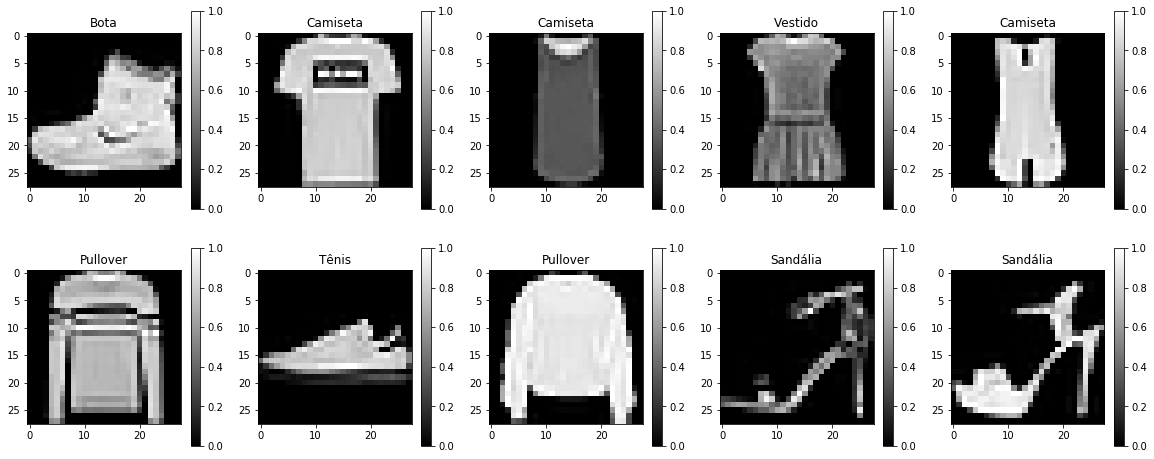

In [7]:
#Redefinir imagens de treino e teste
imagens_treino = np.array(imagens_treino)/np.array(imagens_treino).max()
imagens_teste =  np.array(imagens_teste)/np.array(imagens_teste).max()

#Escala de cinza de cinza escalada
nomes_rotulos=['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

plt.rcParams['figure.figsize'] = (20,8)
for imagem in range (len(nomes_rotulos)):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem],cmap='gray')
    plt.title(nomes_rotulos[rotulos_treino[imagem]])
    plt.colorbar()

# 2. Modelo de Classificação (Redes Neurais)

Redes neurais artificiais (RNAs), geralmente chamadas simplesmente de redes neurais (NNs), são sistemas de computação vagamente inspirados nas redes neurais biológicas que constituem os cérebros dos animais.

Uma RNA é baseada em uma coleção de unidades conectadas ou nós chamados neurônios artificiais, que modelam vagamente os neurônios em um cérebro biológico. Cada conexão, como as sinapses em um cérebro biológico, pode transmitir um sinal a outros neurônios. Um neurônio artificial que recebe um sinal, o processa e pode sinalizar os neurônios conectados a ele. O "sinal" em uma conexão é um número real, e a saída de cada neurônio é calculada por alguma função não linear da soma de suas entradas. As conexões são chamadas de arestas. Neurônios e arestas geralmente têm um peso que se ajusta à medida que o aprendizado avança. O peso aumenta ou diminui a força do sinal em uma conexão. Os neurônios podem ter um limite de modo que um sinal seja enviado apenas se o sinal agregado cruzar esse limite. Normalmente, os neurônios são agregados em camadas. Camadas diferentes podem realizar transformações diferentes em suas entradas. Os sinais viajam da primeira camada (a camada de entrada) até a última camada (a camada de saída), possivelmente depois de atravessar as camadas várias vezes.

![](rede_neural.png)

Se considerarmos 1px deste tamanho para esta imagem que vemos, conseguimos incluir 4px dentro dela, então dividimos esta imagem em 4px. Mas do mesmo modo que tínhamos 28 x 28, podemos ler esses 4px de outra forma, que são 2px para a nossa linha, e 2x para a coluna.

Repare que quando chamamos esta imagem de 2 x 2px, estamos tendo uma imagem de 2 dimensões, linhas e colunas. O que podemos fazer nesta primeira camada que chamamos de camada 0 é pegar esses 2 x 2px e, por exemplo, ter uma função para lidar com cada pixel. Então, teríamos 4 unidades, 1 para cada pixel, e o que elas farão é reordenar e reagrupar estes pixels. Então, em vez de termos 2 dimensões, 2 linhas e 2 colunas, teremos 1 linha e 4 colunas, assim temos 1 dimensão com 4 pixels.

É isso que faremos em nossa primeira camada, que é a que chamamos de camada 0. Essa é a nossa entrada. Voltaremos ao Notebook, e sabemos que em nossa entrada iremos lidar com imagens que temos no dataset, e elas não tinham 2 x 2 pixels, e sim 28 x 28 px. Esses números, que iremos agrupar entre parênteses e com uma vírgula entre eles, são as dimensões que vimos na forma da nossa imagem.

Ver também: <http://scipy-lectures.org/advanced/image_processing/>

In [8]:
#Sequência do modelo
print('Um modelo sequencial é apropriado para uma pilha simples de camadas onde cada camada \ntem exatamente um tensor de entrada e um tensor de saída.')

tamanho=imagens_treino[0].shape[0]
modelo=keras.Sequential([keras.layers.Flatten(input_shape=(tamanho,tamanho))])

Um modelo sequencial é apropriado para uma pilha simples de camadas onde cada camada 
tem exatamente um tensor de entrada e um tensor de saída.


# 3. Camadas das redes neurais

A camada mais icicial de uma rede é chamada de camada de entrada e os neurônios dentro da camada são chamados de neurônios de entrada. A utlima camada de uma é chamada de saída contém os neurônios de saída ou, como neste caso, um único neurônio de saída. A camada do meio é chamada de camada oculta, já que os neurônios nessa camada não são entradas ou saídas. O termo “oculto” talvez soe um pouco misterioso – a primeira vez que ouvi o termo, pensei que devesse ter algum significado filosófico ou matemático profundo – mas isso realmente não significa nada mais do que “uma camada que não é entrada ou saída”. 

O design das camadas de entrada e saída em uma rede geralmente é direto. Por exemplo, suponha que estamos tentando determinar se uma imagem manuscrita cotem um ser humano ou não. Uma maneira natural de projetar a rede é codificar as intensidades dos pixels da imagem nos neurônios de entrada. Se a imagem for uma imagem em escala de cinza 64 x 64, teríamos 64 × 64 = 4.096  neurônios de entrada, com as intensidades dimensionadas adequadamente entre 0 e 1. A camada de saída conterá apenas um único neurônio com valores inferiores a 0,5 indicando que “a imagem de entrada não cotem um ser humano” e valores maiores que 0,5 indicando que “a imagem de entrada é um 9”.

Embora o design das camadas de entrada e saída de uma rede neural seja frequentemente direto, pode haver bastante variação para o design das camadas ocultas. Em particular, não é possível resumir o processo de design das camadas ocultas com poucas regras simples. Em vez disso, pesquisadores de redes neurais desenvolveram muitas heurísticas de design para as camadas ocultas, que ajudam as pessoas a obter o comportamento que querem de suas redes. Conheceremos várias heurísticas de design desse tipo mais adiante ao longo dos próximos capítulos. O design das camadas ocultas é um dos pontos cruciais em modelos de Deep Learning

### Argumentos da função

* **units**: inteiro positivo, dimensionalidade do espaço de saída.
* **activation**: função de ativação a ser usada. Se você não especificar nada, nenhuma ativação será aplicada (ou seja, ativação "linear": a (x) = x).
* **use_bias**: Booleano, se a camada usa um vetor de polarização.
* **kernel_initializer**: inicializador para a matriz de pesos do kernel.
* **bias_initializer**: inicializador para o vetor de polarização.
* **kernel_regularizer**: função regularizer aplicada à matriz de pesos do kernel.
* **bias_regularizer**: função regularizer aplicada ao vetor de polarização.
* **activity_regularizer**: Função regularizer aplicada à saída da camada (sua "ativação").
* **kernel_constraint**: função de restrição aplicada à matriz de pesos do kernel.
* **bias_constraint**: função de restrição aplicada ao vetor de polarização.

In [9]:
#Tamanho das imagens
tamanho_imagem=(28,28)
#Função de ativação 1
funcao_ativacao=tensorflow.nn.relu
#Função de ativação 2
funcao_prob= tensorflow.nn.softmax
#N° de saídas
saidas=10
#Modelo
modelo_1=keras.Sequential([
                         keras.layers.Flatten(input_shape=tamanho_imagem),      #Entrada       (Camada 0)
                         keras.layers.Dense(256,activation=funcao_ativacao),    #Processamento (Camada 1)
                         keras.layers.Dense(saidas,activation=funcao_prob)])    #Saída         (Camada 2)

# Treinar modelo
modelo_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico=modelo_1.fit(imagens_treino,rotulos_treino,epochs=20,validation_split=0.2)


W0928 14:36:44.465826 96688 deprecation.py:506] From C:\Users\Felipe\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 33s 695us/sample - loss: 0.5037 - acc: 0.8220 - val_loss: 0.4035 - val_acc: 0.8587
Epoch 2/20
48000/48000 [==============================] - 41s 845us/sample - loss: 0.3762 - acc: 0.8637 - val_loss: 0.3802 - val_acc: 0.8608
Epoch 3/20
48000/48000 [==============================] - 32s 658us/sample - loss: 0.3363 - acc: 0.8770 - val_loss: 0.3774 - val_acc: 0.8637
Epoch 4/20
48000/48000 [==============================] - 38s 788us/sample - loss: 0.3095 - acc: 0.8860 - val_loss: 0.3315 - val_acc: 0.8797
Epoch 5/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2891 - acc: 0.8929 - val_loss: 0.3345 - val_acc: 0.8810
Epoch 6/20
48000/48000 [==============================] - 39s 804us/sample - loss: 0.2749 - acc: 0.8981 - val_loss: 0.3485 - val_acc: 0.8770
Epoch 7/20
48000/48000 [==============================] - 40s 837us/sample - loss: 0.2621 - acc: 0.9019 - 

# 4. Métricas de avaliação do modelo

## 4.1. Acurácia

A acurácia é a exatidão de um valor obtido com relação a um valor tomado como referência. Valor de referência, pois valor verdadeiro de uma grandeza, teoricamente é um conceito abstrato, já na prática, pode-se dispor de uma grandeza com qualidade superior a outra, podendo-se utiliza-la como parâmetro.Medidas acuradas são aquelas cujo valor se aproxima do valor correto, ou seja, valor de referência.

In [10]:
#Acurácia de teste
perda_teste,acuracia_teste=modelo_1.evaluate(imagens_teste,rotulos_teste)
#
print('Perda do teste    :',round(perda_teste,2))
print('Acurácia do teste :',round(acuracia_teste,2))

10000/10000 [==============================] - 4s 397us/sample - loss: 0.3846 - acc: 0.8875
Perda do teste    : 0.38
Acurácia do teste : 0.89


## 4.2. Matriz de confusão 

In [11]:
#Fazer previsões
teste=modelo_1.predict(imagens_teste)
previsoes=[]
for previsao in teste:
    previsoes.append(np.argmax(previsao))

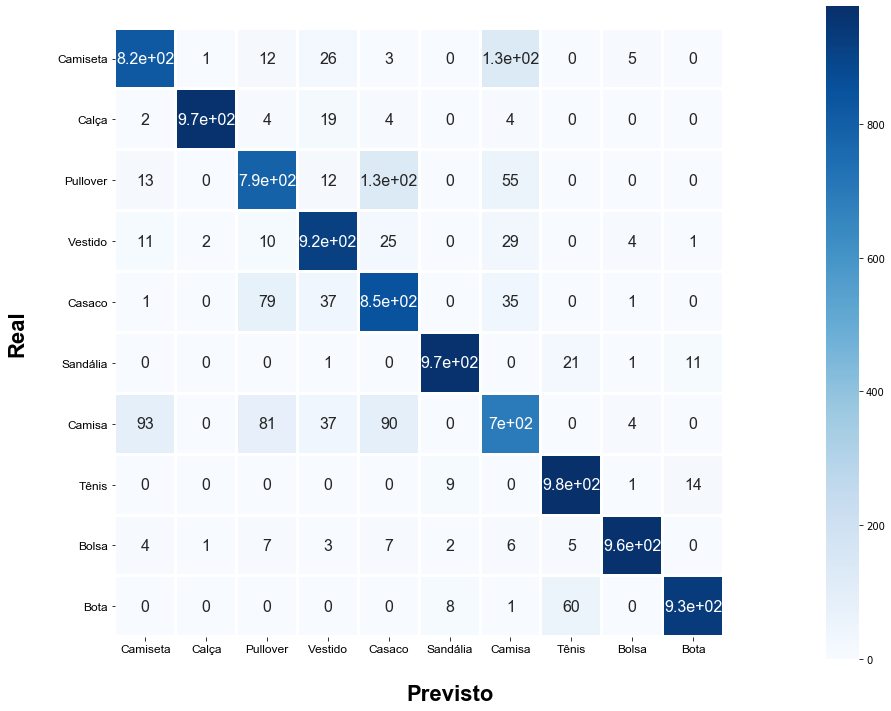

In [12]:
#Comparar com o real 
cf_matrix=confusion_matrix(rotulos_teste,previsoes )
entrada=cf_matrix
maximo=entrada.max().max()
minimo=entrada.min().min()
centro=(maximo-minimo)/2
# Tamanhonda figura 
plt.figure(figsize=(15,15))

# Matriz de correlação na forma de heatmap
ax=sns.heatmap(entrada,annot=True,annot_kws={"size":16,"family":'Arial'},cmap='Blues',
vmax=maximo,vmin=minimo,center=centro,linewidths=2,cbar_kws={"shrink": 0.8},square=True )                             

#Rotulos ds eixos
plt.xticks(fontsize=16,family='Arial',rotation=0)
plt.yticks(fontsize=16,family='Arial',rotation=0)
ax.set_xticklabels(nomes_rotulos,fontsize=12,rotation=0)
ax.set_yticklabels(nomes_rotulos,fontsize=12,rotation=0)

#Eixos
plt.xlabel('Previsto',fontsize=22,labelpad=30,weight='bold',family='Arial')
plt.ylabel('Real',fontsize=22,labelpad=30,weight='bold',family='Arial')
#Corrigir erros de plotagem 
ax.set_xlim(0,11)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
ax=ax

## 4.2. Revocação (*Recall*), Precisão e F1

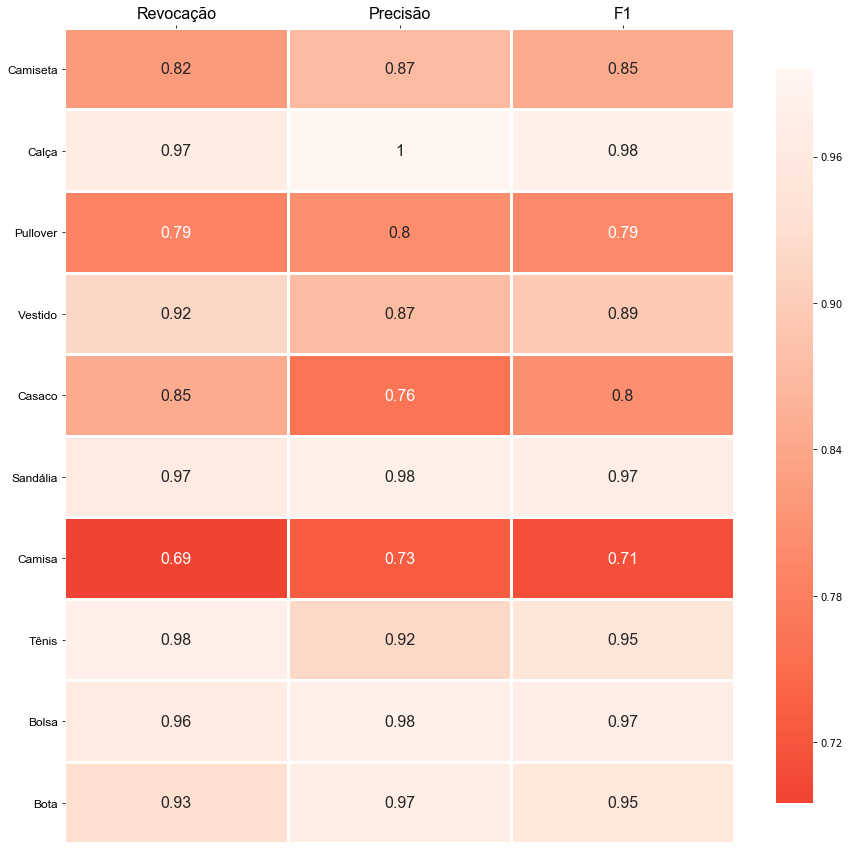

In [13]:
# EM FORMA DE TABELA 
y_true = rotulos_teste
y_pred = previsoes
target_names = np.unique(rotulos_teste)
tab=classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
tab = pd.DataFrame(tab).transpose()
# Separar parte importante 
tab=tab[['recall','precision','f1-score']]
tab.rename(columns={ 'recall':'Revocação','precision':'Precisão','f1-score':'F1'},inplace=True)
tab=tab.loc[np.unique(rotulos_teste)]

# EM FORMA DE HEATMAP
entrada=tab
maximo=entrada.max().max()
minimo=entrada.min().min()
centro=(maximo)*0.75
#Tamnaho da figura 
plt.figure(figsize=(15,15))
# Matriz de correlação na forma de heatmap
ax=sns.heatmap(entrada,annot=True,annot_kws={"size":16,"family":'Arial'},cmap='Reds_r',
vmax=maximo,vmin=minimo,center=centro,square=False, linewidths=2,cbar_kws={"shrink": 0.9} )            
#Rotulos ds eixos
ax.xaxis.tick_top()
plt.xticks(fontsize=16,family='Arial',rotation=0)
plt.yticks(fontsize=16,family='Arial',rotation=0)
ax.set_yticklabels(nomes_rotulos,fontsize=12,rotation=0)

#Corrigir erros de plotagem 
ax.set_xlim(-0,3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
ax=ax